In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'prakriti-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4987049%2F8385141%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240512%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240512T085005Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D09cdaae8521c2403c707d338fa6203d39287a5f5eb215d7a14cabda359987503cdd9d8f80dd52f5159aa3c6c912689485a5e4479bd3145cf635c70dc3cfa9b3505114971e6e81a7964cead7e101e83ee6b54947c679bbe2e5b8d84a4e3cc5ed88232a478ea5d3c76683bce232c4c6930e65373e612d61cfb7e0d699102b260e7c65ad5aa1b2e1d185d17e47ccc3db2e240f6451ba718a05ba31273d7db48e6380d33204e4f85d7442e10b8d9acd1a500d0c273c53a498b3609770435cd07944512da1d64f502e23a62785c5a9fd8e1e4940a6fc7a9cedc1f8728cae090095b19cbf553ea71e115d39f5dedb80b797bd5c0d5ce6d305b5fbe57c02ae59415cff9,final-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4990192%2F8389746%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240512%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240512T085005Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dabddb0cf3bc250c6e02ee2021d717199bd62f5ddf351947e4de20136843cd48c1a55ff5c5118b96cd0c7503764d603882e5091a3af81f3dd60db797cc987fa0bc09163b75ffc6d647f8d85fea2868120b9c120662a07181af6cf39e8ba28ab51ddd006e66dbaba028a9cd8f434eb1f0ecfae4abbb99fdaa74dacc55ba47cc8d64cf51e5056c784ce003ee2f355622a6dbd4bf979c566024e2fa3cb026c57247849850fa25d441476aa3e6675260a4b4849d7fe0903f661f0a702dfba2239a256f41f5fba2e8b5edf674212744e6470162992b4f8c2d9e234693e2638bc539e164645a41be250e4bcb899106b5226cfb2ea45f71da3a725b0eda66cff5d889eba'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 16327 bytes downloaded
Downloaded and uncompressed: prakriti-dataset
[==================================================] 5868 bytes downloaded
Downloaded and uncompressed: final-dataset
Data source import complete.


In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('/kaggle/input/prakriti-dataset/data.csv')
dataset = dataset.drop('SampleIdx', axis=1)
dataset.head()

,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,eyebrow_Size,...,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled,class
0,Male,Weaklydeveloped,Thin/Narrow,Long,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Pimples,Non_Wrinkled,Vata
1,Male,Welldeveloped,Broad,Long,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Non_Pimples,Non_Wrinkled,Kapha
2,Male,Weaklydeveloped,Thin/Narrow,Long,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Proportionate,Large,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Cracked,Non_Freckles,Non_Marks,Moles,Pimples,Wrinkled,Vata
3,Male,Weaklydeveloped,Thin/Narrow,Long,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Cracked,Non_Freckles,Non_Marks,Non_Moles,Non_Pimples,Wrinkled,Vata
4,Male,Welldeveloped,Broad,Long,Black,Broad,Black,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled,Kapha


In [4]:
def print_unique_values():
    for column in dataset:
        print(f'{column}:\t\t {dataset[column].unique()}')
print_unique_values()

Gender:		 ['Male' 'Female']
bodyBuild_Size:		 ['Weaklydeveloped' 'Welldeveloped' 'Moderatelydeveloped']
bodyFrame_Breadth:		 ['Thin/Narrow' 'Broad' 'Medium']
bodyFrame_Length:		 ['Long' 'Medium' 'Tooshort/Toolong' nan]
bodyHair_Color:		 ['Black' 'DarkBrown' 'LightBrown' 'Dusky' nan]
chest_Breadth:		 ['Thin/Narrow' 'Broad' 'Medium']
eye_Color:		 ['DarkBrown' 'LightBrown' 'Black' 'Grayish']
eye_Size:		 ['Moderatelydeveloped' 'Weaklydeveloped' 'Welldeveloped']
eye_Symmetry:		 ['Proportionate' 'Disproportionate']
eyebrow_Size:		 ['Medium' 'Large' 'Small' nan]
eyelash_Size:		 ['Small' 'Medium' 'Large']
face_Size:		 ['Moderatelydeveloped' 'Welldeveloped' 'Weaklydeveloped']
forehead_Breadth:		 ['Medium' 'Broad' 'Thin/Narrow' nan]
forehead_Length:		 ['Medium' 'Long' 'Tooshort/Toolong' nan]
hair_Growth:		 ['Moderate' 'Scanty' nan 'Dense']
hair_Nature:		 ['Normal' 'Seasonal/Variable' 'Dry' nan 'Oily']
hair_Type:		 ['Thin' 'Thick']
hands_Length:		 ['Long' 'Medium' 'Tooshort/Toolong']
joint_Size:	

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encoded = dataset.apply(le.fit_transform)

data_encoded.head()

,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,eyebrow_Size,...,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled,class
0,1,1,2,0,0,2,1,0,1,1,...,1,1,0,1,1,1,1,1,0,2
1,1,2,0,0,1,0,1,0,1,1,...,1,1,0,1,1,0,1,0,0,0
2,1,1,2,0,3,2,3,1,1,0,...,1,1,1,0,1,1,0,1,1,2
3,1,1,2,0,2,2,1,1,1,1,...,1,1,0,0,1,1,1,0,1,2
4,1,2,0,0,0,0,0,0,1,1,...,1,1,1,1,1,0,0,0,0,0


In [6]:
X=data_encoded.iloc[:,:-1].values
y=data_encoded.iloc[:,-1].values

print(X.shape)

(147, 133)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer

model = Sequential([
    Dense(133, input_shape=(133,),activation='relu'),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
4/4 [==============================] - 1s 4ms/step - loss: 1.0786 - accuracy: 0.4216
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6362 - accuracy: 0.7941
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.4367 - accuracy: 0.9412
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3122 - accuracy: 0.9608
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2203 - accuracy: 0.9804
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1629 - accuracy: 0.9902
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1118 - accuracy: 0.9902
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9902
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0642 - accuracy: 0.9902
Epoch 10/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 11/20
4/4 [======================

In [14]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4625 - accuracy: 0.8444


[0.46250903606414795, 0.8444444537162781]

In [15]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)

2/2 [==============================] - 0s 6ms/step


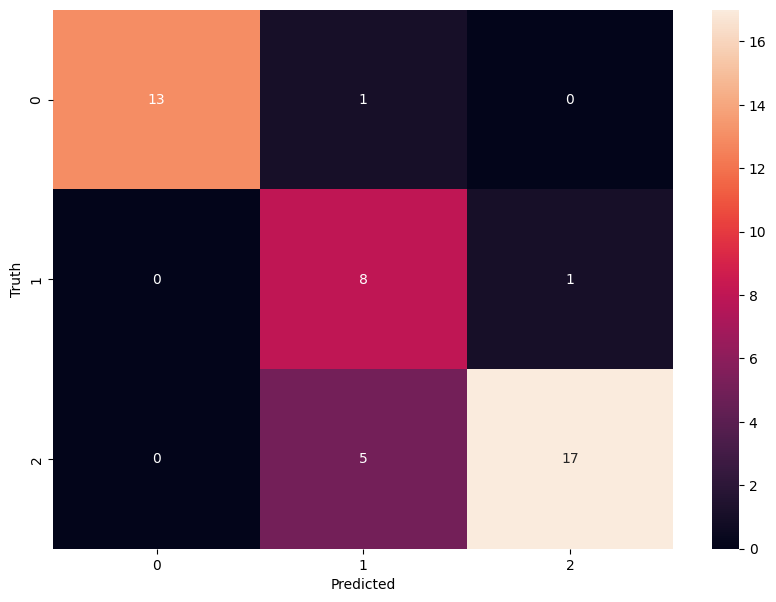

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [17]:
!pip install joblib

In [18]:
import joblib

In [19]:
joblib.dump(model,"model.pkl")

['model.pkl']